In [1]:
import os
import glob
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# concatenate the csv files.
# maybe just cat file1.csv file2.csv > outputfile.csv ...?
# todo: try and see what's fastest with many 'big' csv files
cwd = os.getcwd()
# for now...
os.chdir('/Users/geo/london_bikes/London-bikes-analysis/data')

files_names = [i for i in glob.glob('*.csv')]
# show list of all the files
print(files_names)

april_bikes_df = pd.concat([pd.read_csv(file) for file in files_names ]).reset_index(drop=True)
# ../ just to avoid concatenating with final_csv by mistake when re-running this cell
april_bikes_df.to_csv( "../final_csv.csv", index=False, encoding='utf-8')

['155JourneyDataExtract27Mar2019-02Apr2019.csv', '156JourneyDataExtract03Apr2019-09Apr2019.csv', '157JourneyDataExtract10Apr2019-16Apr2019.csv', '158JourneyDataExtract17Apr2019-23Apr2019.csv', '159JourneyDataExtract24Apr2019-30Apr2019.csv']


In [6]:
print(april_bikes_df.head())
#print(april_bikes_df.shape)
#print(april_bikes_df.groupby(final_df['Start Date'].dt.month).size())

   Rental Id  Duration  Bike Id          End Date  EndStation Id  \
0   85543563       300     9684  02/04/2019 15:07             39   
1   85477871      1020    13129  31/03/2019 08:02            835   
2   85372880      1080    16167  28/03/2019 03:29            715   
3   85407859       900    14992  29/03/2019 07:41            835   
4   85499459      1080    13129  01/04/2019 07:54            835   

                      EndStation Name        Start Date  StartStation Id  \
0  Shoreditch High Street, Shoreditch  02/04/2019 15:02              702   
1          Farringdon Street, Holborn  31/03/2019 07:45              553   
2             Aylward Street, Stepney  28/03/2019 03:11              194   
3          Farringdon Street, Holborn  29/03/2019 07:26              553   
4          Farringdon Street, Holborn  01/04/2019 07:36              553   

              StartStation Name  
0  Durant Street, Bethnal Green  
1    Regent's Row , Haggerston   
2     Hop Exchange, The Borough 

In [7]:
april_bikes_df['Start Date'] = pd.to_datetime(april_bikes_df['Start Date'],format = '%d/%m/%Y %H:%M')
april_bikes_df['End Date'] = pd.to_datetime(april_bikes_df['End Date'],format = '%d/%m/%Y %H:%M')

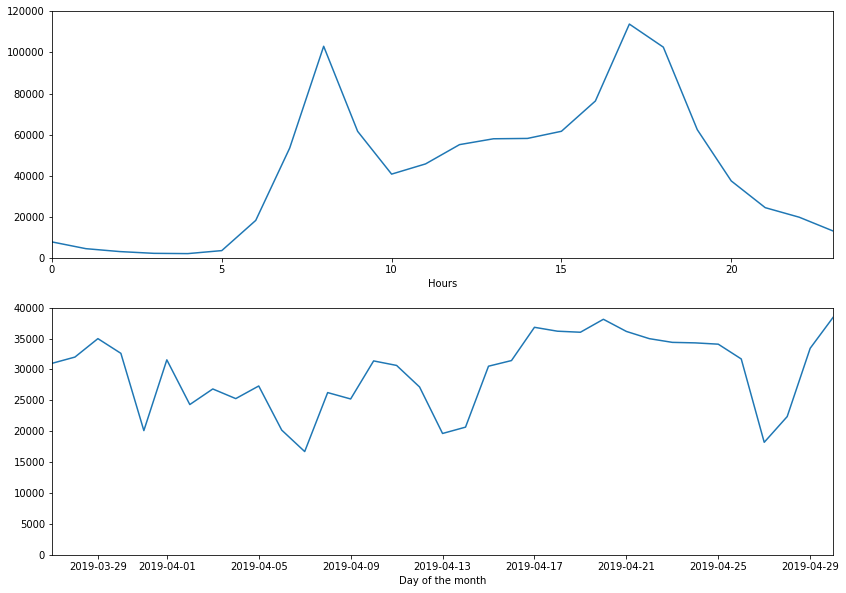

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14,10))
ax2.set_ylim(0,40000)
ax1.set_ylim(0,120000)
april_bikes_df.groupby(april_bikes_df['Start Date'].rename('Hours').dt.hour).size().plot(ax=ax1)
april_bikes_df.groupby(april_bikes_df['Start Date'].rename('Day of the month').dt.date).size().plot(ax=ax2)

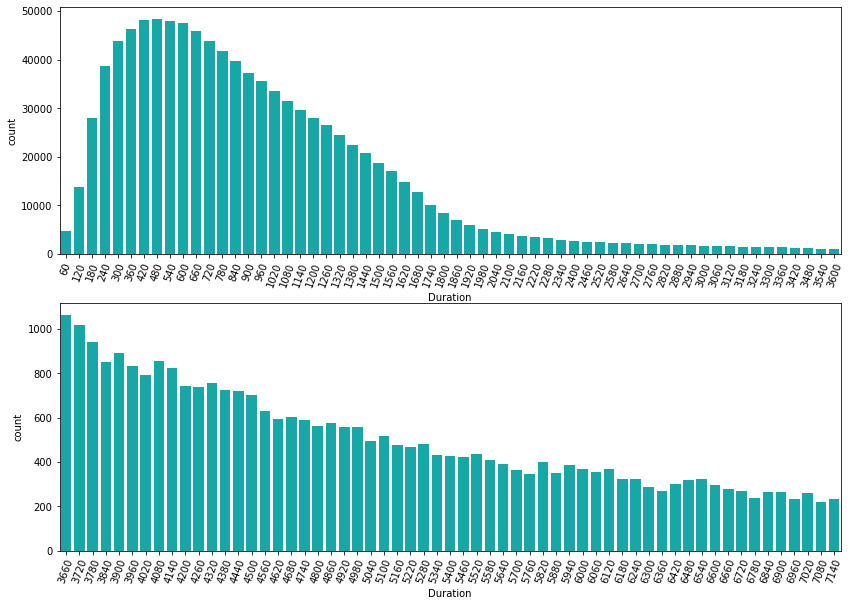

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14,10))

sns.countplot(data = april_bikes_df[april_bikes_df['Duration'] <= 3600],
              x = 'Duration',
              ax = ax1,
              color = 'c')

sns.countplot(data = april_bikes_df[(april_bikes_df['Duration'] > 3600) & (april_bikes_df['Duration'] < 7200)],
              x = 'Duration',
              ax = ax2,
              color = 'c')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
plt.show()

In [40]:
print(final_df['Duration'].mean())
print(final_df['Duration'].median())
print(final_df[final_df['Duration'] < 10000].shape)

1275.5519115614925
840.0
(1023715, 9)


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14,10))

sns.countplot(data = df_less_than_1h, x = 'Duration', ax = ax1, color = 'c')
sns.countplot(data = df_more_than_1h, x = 'Duration', ax = ax2, color = 'c')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14,10))
sns.lineplot(x="date", y="number of bikes", data=final_df['Start Date Day'].map(lambda x: x.strftime("%m-%d-%Y")))